## Анализ данных о состоявшихся рейсах из Анапы за зимний период 2017 года

In [1]:
import pandas as pd
df = pd.read_csv("2017_winter_flights_from_anapa.csv")

In [2]:
df.head(2)

,flight_id,flight_no,departure_month,arrival_airport,aircraft,seats_by_model,business_seats,economy_seats,flight_time_minutes,sold_tickets_total,economy_tickets,business_tickets,total_revenue,economy_revenue,business_revenue
0,136119,PG0252,1.0,SVO,Boeing 737-300,130,12,118,101.0,113,102,11,1653000.0,1250400.0,402600.0
1,136120,PG0252,2.0,SVO,Boeing 737-300,130,12,118,99.0,109,98,11,1605400.0,1202800.0,402600.0


### Описание данных

- **flight_id** - идентификатор рейса (суррогатный ключ в исходной таблице FLIGHTS)
- **flight_no** - номер рейса
- **arrival_airport** - аэропорт прибытия
- **aircraft** - модель воздушного судна
- **seats_by_model** - вместимость (количество мест на борту)
- **flight_time_minutes**	- время полета в соответствии с рейсом
- **sold_tickets_total** - суммарное количество проданных билетов за анализируемый период
- **economy_tickets**	- количество проданных билетов в классе "эконом"
- **business_tickets** - количество проданных билетов в классе "бизнес"
- **total_revenue** - суммарная выручка с продажи билетов во всех классах
- **economy_revenue** - выручка от продажи билетов в классе "эконом"
- **business_revenue** - выручка от продажи билетов в классе "бизнес"

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   flight_id            127 non-null    int64  
 1   flight_no            127 non-null    object 
 2   departure_month      127 non-null    float64
 3   arrival_airport      127 non-null    object 
 4   aircraft             127 non-null    object 
 5   seats_by_model       127 non-null    int64  
 6   business_seats       127 non-null    int64  
 7   economy_seats        127 non-null    int64  
 8   flight_time_minutes  127 non-null    float64
 9   sold_tickets_total   127 non-null    int64  
 10  economy_tickets      127 non-null    int64  
 11  business_tickets     127 non-null    int64  
 12  total_revenue        118 non-null    float64
 13  economy_revenue      118 non-null    float64
 14  business_revenue     118 non-null    float64
dtypes: float64(5), int64(7), object(3)
memor

Из краткой сводки о данных видно, что **имеется по 9 пропусков** в колонках **total_revenue**, **economy_revenue** и **business_revenue** к ним вернемся позже

In [4]:
# Определим модели судов курсировавших на выбранных рейсах
df.aircraft.unique()

array(['Boeing 737-300', 'Sukhoi Superjet-100'], dtype=object)

In [5]:
# Определим номера рейсов в датасете
df.flight_no.unique()

array(['PG0252', 'PG0194', 'PG0480'], dtype=object)

In [6]:
# Определим количество совершенных рейсов за указаный период
df.flight_id.unique().size

127

In [7]:
# Определим в какие 3 аэропорта (города) совершались рейсы
df.arrival_airport.unique()

array(['SVO', 'NOZ', 'EGO'], dtype=object)

In [8]:
# Определим по сколько рейсов было совершено в каждый из городов
df.arrival_airport.value_counts()

SVO    59
EGO    59
NOZ     9
Name: arrival_airport, dtype: int64

### Что имеем на данном этапе?

- Две модели воздушных судов: Boeing 737-300 и Sukhoi Superjet-100
- Три номера рейсов, соответственно три города назначения: Москва (SVO - Шереметьево), Новокузнецк (NOZ - Спиченково), Белгород (EGO)
- 127 совершенных рейсов, на 9 из которых возможно билетов не было продано (судя по тому, что в total_revenue имеются пропуски)

### Работа с пропусками

Попробуем выяснить в каких строках имеются пропуски

In [9]:
df[df['total_revenue'].isnull()]

,flight_id,flight_no,departure_month,arrival_airport,aircraft,seats_by_model,business_seats,economy_seats,flight_time_minutes,sold_tickets_total,economy_tickets,business_tickets,total_revenue,economy_revenue,business_revenue
59,136511,PG0194,2.0,NOZ,Boeing 737-300,130,12,118,310.0,0,0,0,NaN,NaN,NaN
60,136513,PG0194,2.0,NOZ,Boeing 737-300,130,12,118,310.0,0,0,0,NaN,NaN,NaN
61,136514,PG0194,2.0,NOZ,Boeing 737-300,130,12,118,299.0,0,0,0,NaN,NaN,NaN
62,136523,PG0194,1.0,NOZ,Boeing 737-300,130,12,118,312.0,0,0,0,NaN,NaN,NaN
63,136540,PG0194,1.0,NOZ,Boeing 737-300,130,12,118,307.0,0,0,0,NaN,NaN,NaN
64,136544,PG0194,1.0,NOZ,Boeing 737-300,130,12,118,304.0,0,0,0,NaN,NaN,NaN
65,136546,PG0194,1.0,NOZ,Boeing 737-300,130,12,118,302.0,0,0,0,NaN,NaN,NaN
66,136560,PG0194,1.0,NOZ,Boeing 737-300,130,12,118,305.0,0,0,0,NaN,NaN,NaN
67,136567,PG0194,2.0,NOZ,Boeing 737-300,130,12,118,311.0,0,0,0,NaN,NaN,NaN


Из данного фрагмента датасета видно, что все пропуски сконцентрированы в одном месте и связаны с тем, что **все рейсы** совершенные в **Новокузнецк** были осуществлены **без продажи билетов**. Что это ошибка в данных или же это какие-то спец. рейсы? К сожалению, у нас нет информации на этот счет, думаю нам не стоит включать эти рейсы в анализ прибыльности.

In [10]:
# Добавим признак заполненности борта выраженный в процентах
df['board_occupancy'] = round(df['sold_tickets_total']*100/df['seats_by_model'], 2)

In [11]:
# исключим рейсы в Новокузнецк из датасета
df = df.dropna()

## Способ 1. Выявление убыточных рейсов на основе расходов

### Себестоимость рейсов 

Попробуем оценить расходы связанные с каждым из рейсов чтобы вычислить себестоимость рейсов.

По данным найденным в открытых источниках выяснилось, что доля расходов связанных с региональными перелетами по России распределяется следующим образом:

- **Расходы на топливо:** от **25% до 27%** (на коротких рейсах немного выше) от стоимости билета;
- **Обслуживание:** (питание, багаж, мягкий инвентарь, доставка всего этого на борт, сайты, приложения, пошлины, налоги) **25% - 26%** от стоимости билета;
- **Амортизация, лизинг, реклама:** **13%** от стоимости билета (50% от этой суммы затрачивается на рекламу);
- **Обслуживание самолета:** **16%** (подготовка к посадке/взлету (50%), закачка воды, слив туалетов, чек (контроль) авиатехников и т.д.(50%));
- **Навигация, прогноз погоды:** около **4%**;
- **Зарплата сотрудников:** около **10%**;
- **Прибыль 4-5%**


In [12]:
df.head()

,flight_id,flight_no,departure_month,arrival_airport,aircraft,seats_by_model,business_seats,economy_seats,flight_time_minutes,sold_tickets_total,economy_tickets,business_tickets,total_revenue,economy_revenue,business_revenue,board_occupancy
0,136119,PG0252,1.0,SVO,Boeing 737-300,130,12,118,101.0,113,102,11,1653000.0,1250400.0,402600.0,86.92
1,136120,PG0252,2.0,SVO,Boeing 737-300,130,12,118,99.0,109,98,11,1605400.0,1202800.0,402600.0,83.85
2,136122,PG0252,1.0,SVO,Boeing 737-300,130,12,118,100.0,97,87,10,1431000.0,1065000.0,366000.0,74.62
3,136130,PG0252,2.0,SVO,Boeing 737-300,130,12,118,99.0,107,97,10,1556600.0,1190600.0,366000.0,82.31
4,136131,PG0252,1.0,SVO,Boeing 737-300,130,12,118,99.0,124,112,12,1812800.0,1373600.0,439200.0,95.38


In [13]:
# посчитаем выручку идеального случая (проданы билеты на все места)
df['full_board_revenue'] = (df.economy_revenue*df.economy_seats/df.economy_tickets+
                   df.business_revenue*df.business_seats/df.business_tickets)

Попробуем определить затраты на "идеальный рейс" на основе вышеприведенного сценария распределения долей затрат и прибыли (примем, что прибыль 5%).

### Добавляем новые столбцы

Добавим данные связанные с расходами и прибылью, которые будут расчитываться как доля на основе ранее перечисленных процентов от выручки **full_board_revenue**(продажа билетов на все места на борту)

- **fuel** - расход топлива
- **passenger_service** - обслуживание пассажиров
- **aircraft_service** - обслуживание судна
- **staff_salary** - зарплата сотрудников
- **aircraft_depreciation** - амортизация воздушного судна
- **advertisement** - реклама
- **air_navigation** - аэронавигация
- **full_board_profit** - прибыль от продажи билетов на все места

In [14]:
# введем новые колонки с распределением долей затрат и прибыли
df['fuel'] = df['full_board_revenue']*0.26
df['passenger_service'] = df['full_board_revenue']*0.26
df['aircraft_service'] = df['full_board_revenue']*0.16
df['staff_salary'] = df['full_board_revenue']*0.1
df['aircraft_depreciation'] = df['full_board_revenue']*0.08
df['advertisement'] = df['full_board_revenue']*0.05
df['air_navigation'] = df['full_board_revenue']*0.04
df['full_board_profit'] = df['full_board_revenue']*0.05

Теперь попробуем расчитать приближенную к реалиям прибыль от перелетов (назовем ее **real_profit**). Т.к. расходы, как при полной так и не полной заполненности борта пассажирами более менее одинакова (возможно отличается в меньшую сторону **passenger_service**, но мы примем, что тоже плюс минус на том же уровне). Расчитывать будем вычитанием указанных расходов от фактической выручки **total_revenue** из исходного датасета.

In [15]:
df['real_profit'] = df['total_revenue'] - df['fuel'] - df['passenger_service'] \
- df['aircraft_service'] - df['staff_salary'] - df['aircraft_depreciation'] \
- df['advertisement'] - df['air_navigation']

In [16]:
# для построения графика импортируем необходимые библиотеки
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

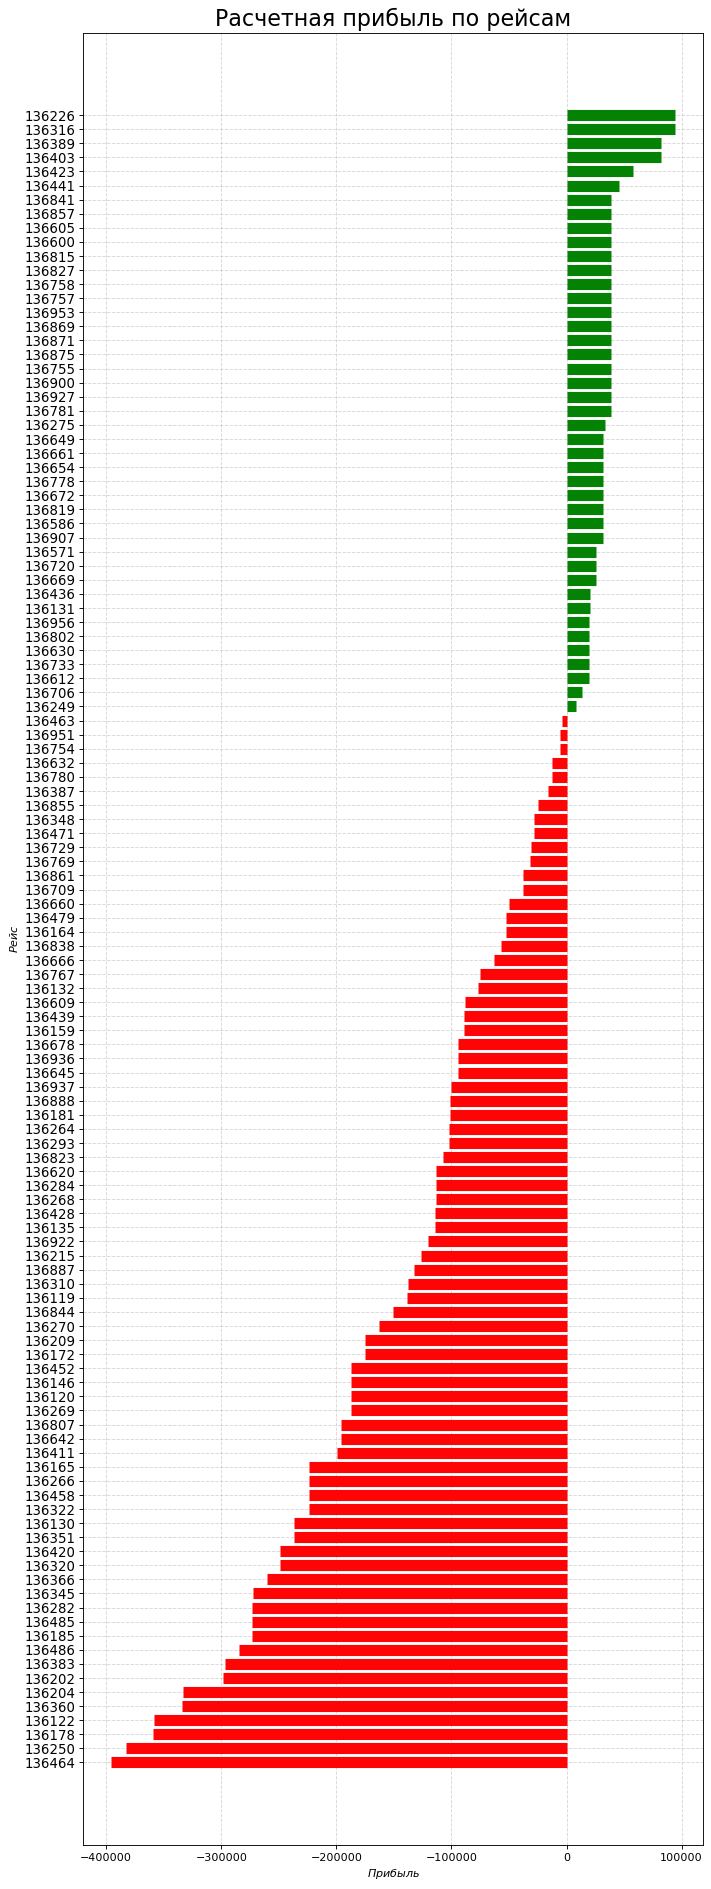

In [17]:
# Подготовка данных
df['colors'] = ['red' if x < 0 else 'green' for x in df['real_profit']]
df.sort_values('real_profit', inplace=True)
df.reset_index(inplace=True)

# Построение линейчатой диаграммы
plt.figure(figsize=(10,30), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.real_profit, color=df.colors, alpha=5, linewidth=10)

# Оформление диаграммы
plt.gca().set(ylabel='$Рейс$', xlabel='$Прибыль$')
plt.yticks(df.index, df.flight_id, fontsize=12)
plt.title('Расчетная прибыль по рейсам', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

Подсчитаем сколько всего убыточных рейсов

In [18]:
unprofitable_df = df.loc[df['real_profit'] < 0][['flight_id', 'arrival_airport', 'real_profit']]
unprofitable_df

,flight_id,arrival_airport,real_profit
0,136464,SVO,-395538.709677
1,136250,SVO,-382972.967033
2,136178,SVO,-359228.000000
3,136122,SVO,-358498.620690
4,136360,SVO,-334152.558140
...,...,...,...
70,136780,EGO,-12431.103896
71,136632,EGO,-12307.500000
72,136754,EGO,-6090.769231
73,136951,EGO,-6069.615385


In [19]:
# выведем общий список убыточных flight_id
unprofitable_df['flight_id'].unique()

array([136464, 136250, 136178, 136122, 136360, 136204, 136202, 136383,
       136486, 136185, 136485, 136282, 136345, 136366, 136320, 136420,
       136351, 136130, 136322, 136458, 136266, 136165, 136411, 136642,
       136807, 136269, 136120, 136146, 136452, 136172, 136209, 136270,
       136844, 136119, 136310, 136887, 136215, 136922, 136135, 136428,
       136268, 136284, 136620, 136823, 136293, 136264, 136181, 136888,
       136937, 136645, 136936, 136678, 136159, 136439, 136609, 136132,
       136767, 136666, 136838, 136164, 136479, 136660, 136709, 136861,
       136769, 136729, 136471, 136348, 136855, 136387, 136780, 136632,
       136754, 136951, 136463], dtype=int64)

In [20]:
# рейсы в Москву
SVO_unprof = unprofitable_df.loc[unprofitable_df['arrival_airport'] == 'SVO'][['flight_id', 'real_profit']]
SVO_unprof.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 74
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   flight_id    49 non-null     int64  
 1   real_profit  49 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [21]:
# выведем список убыточных flight_id для Москвы
SVO_unprof['flight_id'].unique()

array([136464, 136250, 136178, 136122, 136360, 136204, 136202, 136383,
       136486, 136185, 136485, 136282, 136345, 136366, 136320, 136420,
       136351, 136130, 136322, 136458, 136266, 136165, 136411, 136269,
       136120, 136146, 136452, 136172, 136209, 136270, 136119, 136310,
       136215, 136135, 136428, 136268, 136284, 136293, 136264, 136181,
       136159, 136439, 136132, 136164, 136479, 136471, 136348, 136387,
       136463], dtype=int64)

In [22]:
# рейсы в Белгород
EGO_unprof = unprofitable_df.loc[unprofitable_df['arrival_airport'] == 'EGO'][['flight_id', 'real_profit']]
EGO_unprof.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 23 to 73
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   flight_id    26 non-null     int64  
 1   real_profit  26 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 624.0 bytes


In [23]:
# выведем список убыточных flight_id для Белгорода
EGO_unprof['flight_id'].unique()

array([136642, 136807, 136844, 136887, 136922, 136620, 136823, 136888,
       136937, 136645, 136936, 136678, 136609, 136767, 136666, 136838,
       136660, 136709, 136861, 136769, 136729, 136855, 136780, 136632,
       136754, 136951], dtype=int64)

**Всего убыточных рейсов 75, из которых 49 рейсы в Москву, а 26 в Белгород.**

## Способ 2. Выявление убыточных рейсов на основе заполняемости бортов

Возможно наш подход с распределением расходов в процентах при расчете себестоимости не совсем соответствует данным из датасета, однако я думаю в любом случае плюс/минус около 20 рейсов в нижней части графика будут убыточными даже если оценивать убыточность по заполняемости.

Выведем список рейсов по которым заполненность борта составила менее 75%

In [24]:
df[df.board_occupancy < 75]

,index,flight_id,flight_no,departure_month,arrival_airport,aircraft,seats_by_model,business_seats,economy_seats,flight_time_minutes,...,fuel,passenger_service,aircraft_service,staff_salary,aircraft_depreciation,advertisement,air_navigation,full_board_profit,real_profit,colors
3,2,136122,PG0252,1.0,SVO,Boeing 737-300,130,12,118,100.0,...,489757.517241,489757.517241,301389.241379,188368.275862,150694.620690,94184.137931,75347.310345,94184.137931,-358498.620690,red
4,38,136360,PG0252,2.0,SVO,Boeing 737-300,130,12,118,100.0,...,489772.279070,489772.279070,301398.325581,188373.953488,150699.162791,94186.976744,75349.581395,94186.976744,-334152.558140,red
23,77,136642,PG0480,1.0,EGO,Sukhoi Superjet-100,97,12,85,49.0,...,198934.666667,198934.666667,122421.333333,76513.333333,61210.666667,38256.666667,30605.333333,38256.666667,-195876.666667,red
24,102,136807,PG0480,2.0,EGO,Sukhoi Superjet-100,97,12,85,50.0,...,198861.000000,198861.000000,122376.000000,76485.000000,61188.000000,38242.500000,30594.000000,38242.500000,-195607.500000,red


Однако, если мы примем рейсы выведенные выше (заполненность борта менее 75%) как самые убыточные, то совершим ошибку, т.к. в датасете есть рейсы с большей заполненностью, но меньшей выручкой, злую шутку здесь может сыграть комбинация проданных эконом и бизнес классов.
По этому выведем отдельно в порядке возрастания рейсы в Москву и Белгород.

In [25]:
# отфильтруем датасет оставив рейсы в МСК
MSK_df = df.loc[df['arrival_airport'] == 'SVO'][['flight_id', \
                                                     'total_revenue', 'seats_by_model', \
                                                         'sold_tickets_total', 'economy_tickets', \
                                                             'business_tickets', 'board_occupancy']]
# сортировка по выручке (по возрастанию)
MSK_df.sort_values(['total_revenue'],ascending=True).head(20)

,flight_id,total_revenue,seats_by_model,sold_tickets_total,economy_tickets,business_tickets,board_occupancy
0,136464,1398000.0,130,100,93,7,76.92
1,136250,1407800.0,130,99,91,8,76.15
3,136122,1431000.0,130,97,87,10,74.62
2,136178,1434600.0,130,99,90,9,76.15
4,136360,1455400.0,130,97,86,11,74.62
5,136204,1457800.0,130,107,101,6,82.31
7,136383,1493200.0,130,106,98,8,81.54
6,136202,1495600.0,130,100,89,11,76.92
8,136486,1505400.0,130,107,99,8,82.31
12,136345,1517600.0,130,108,100,8,83.08


Из отсортированного фрагмента видим что выручка при заполненности **74.62%** рейса **136360** превышает выручку при заполненности **76.92%** рейса **136464**.

Думаю, что первые 8 рейсов **Анапа-Москва**: **136464, 136250, 136122, 136178, 136360, 136204, 136383, 136202** можно считать убыточными

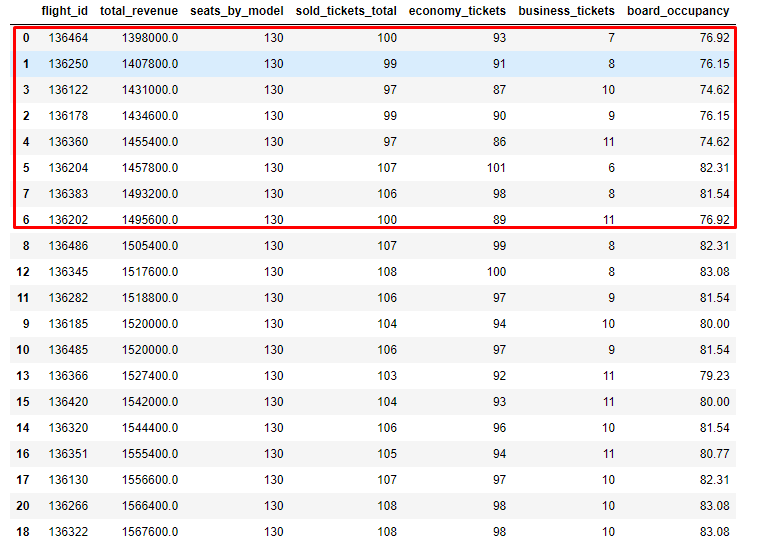

Аналогично поступим и с рейсами в Белгород.

In [26]:
# отфильтруем датасет оставив рейсы в Белгород
Belg_df = df.loc[df['arrival_airport'] == 'EGO'][['flight_id', \
                                                     'total_revenue','seats_by_model', \
                                                         'sold_tickets_total', 'economy_tickets', \
                                                             'business_tickets', 'board_occupancy']]
# сортировка по выручке (по возрастанию)
Belg_df.sort_values(['total_revenue'],ascending=True).head(20)

,flight_id,total_revenue,seats_by_model,sold_tickets_total,economy_tickets,business_tickets,board_occupancy
23,136642,531000.0,97,64,54,10,65.98
24,136807,531000.0,97,68,60,8,70.10
32,136844,575100.0,97,79,73,6,81.44
35,136887,595200.0,97,78,70,8,80.41
37,136922,607800.0,97,76,66,10,78.35
42,136620,613500.0,97,79,70,9,81.44
43,136823,620400.0,97,78,68,10,80.41
47,136888,626100.0,97,79,69,10,81.44
48,136937,626100.0,97,81,72,9,83.51
51,136678,631200.0,97,80,70,10,82.47


**С рейсами в Белгород ситуация в плане запалняемости получше**, что впрочем очевидно - вместимость борта Sukhoi Superjet-100 всего 97 мест. Очевидно выбор именно этой модели был связан с анализом пассажирапотока в Белгород. Впрочем, статьи из Интернета также подтверждают, что "Сушка" создавалась для подобных рейсов.

Думаю в списке рейсов в Белгород убыточными можно считать рейсы **136642** и **136807** с заполненностью **65,98%** и **70,1%** соответственно.

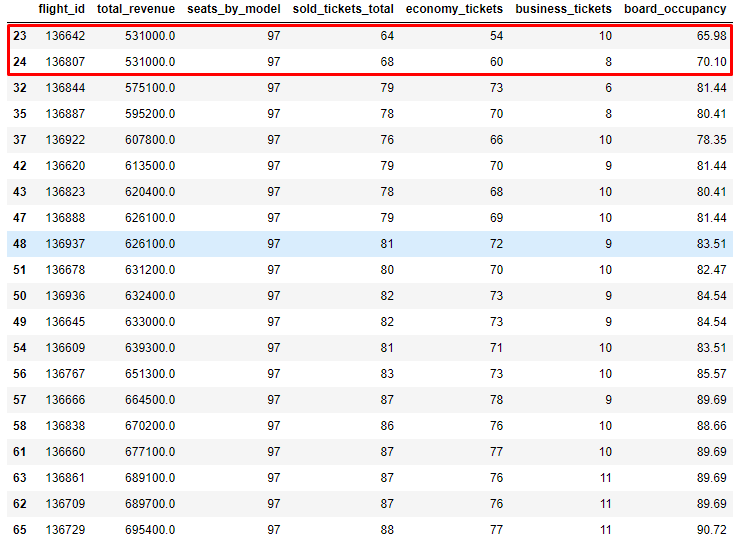

### Выводы

Также можно произвести примерную проверку первого сценария по расходу топлива. Так как имеем всего две модели самолетов нетрудно ввести показатель учитывающий расход топлива на перелет по каждому рейсу. По данным из открытых источников расход топлива судами составляет в час составляет:

**Boeing 737-300** - 2,4 тыс. кг/ч (**40 кг/мин**)

**Sukhoi Superjet-100** - 1,7 тыс. кг/ч (**28,33 кг/мин**)

Стоимость авиационного керосина в Анапе можно узнать по <a href='https://favt.gov.ru/dejatelnost-ajeroporty-i-ajerodromy-ceny-na-aviagsm/?id=7329'>ссылке на сайте Федерального агентства воздушного транспорта (Росавиация)</a>.

По данным сайта тарифы ООО "Базовый Топливный Оператор" составляли:
- в январе 41435 руб/т без НДС
- в феврале 39553 руб/т без НДС
- в декабре 47101 руб/т без НДС

Не буду приводить расчеты чтобы не загромождать ноутбук, скажу лишь что по этим данным затраты на топливо выходят менее 26% от максимальной выручки заполненного на 100% рейса в Москву и составляют около 10% (12% при расчете с НДС на топливо 20%). 
О чем это говорит? Либо данные о выручке завышены, либо данные о распределении долей затрат в себестоимости далеки от реальности.


В любом случае у нас есть два сценария:
- по первому убыточными являются 75 рейсов из 118 (без рейсов в NOZ)
- по второму убыточными являются 10 рейсов (8 рейсов Анапа-Москва: 136464, 136250, 136122, 136178, 136360, 136204, 136383, 136202 и 2 рейса в Белгород (136642 и 136807)).
